In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } "
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))
np.set_printoptions(linewidth=200)
#import importlib
#importlib.reload(module) 
#plt.style.use('ggplot')

In [14]:
from low_gain import jsa, gaussian, tophat
import numpy as np
import sys

scale1 = 1.0
scale2 = 1.0

In [3]:

l = 14000.0
sigma1 = 1.25042*scale1
sigma2 = 1.2608*scale2

alpha  = lambda x: gaussian(x, sigma1)
beta = lambda x: gaussian(x, sigma2)

In [5]:
wc1 = 0.0
wcp1 = 0.0
jsa(wc1, wcp1, l, alpha, beta)

(4.097773652647334, 1.5213225184957573e-08)

In [9]:
def jsa_diag(l, alpha, beta, ws):
    return np.array([jsa(w, w, l, alpha, beta)[0] for w in ws])

def jsa_anti_diag(l, alpha, beta, ws):
    return np.array([jsa(w, -w, l, alpha, beta)[0] for w in ws])


In [10]:
wcs = np.arange(-30,30,0.1)


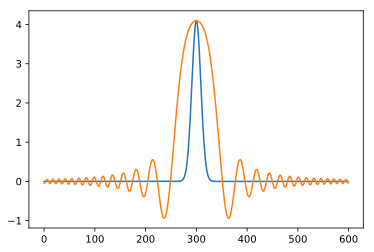

In [11]:
plt.plot(jsa_diag(l, alpha, beta, wcs))
plt.plot(jsa_anti_diag(l, alpha, beta, wcs))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/home/nicolas/Code/kerr/KerrSqueezing/low_gain.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(toint1,-np.inf,np.inf)


17
18
19
20
21
22
23
24
25
26


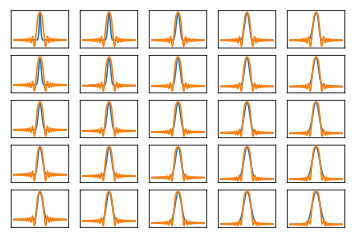

In [13]:
s1 = [0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5,2.8]
s1 = [1.0,2.0,3.0,4.0,5.0]
n = len(s1) 
counter = 1
for i,sc1, in enumerate(s1):
    for j,sc2, in enumerate(s1):
        plt.subplot(n,n,counter)
        alpha  = lambda x: gaussian(x, sc1*sigma1)
        beta = lambda x: gaussian(x, sc2*sigma2)
        y1 = jsa_diag(l, alpha, beta, wcs)
        y2 = jsa_anti_diag(l, alpha, beta, wcs)
        plt.plot(y1)
        plt.plot(y2)
        plt.xticks([])
        plt.yticks([])
        counter = counter+1
        print(counter)
        
plt.savefig("fig1.svg")

### From https://arxiv.org/pdf/1812.03158.pdf Supplementary materials

To pump the sources, laser pulses were generated via a tunable laser (PriTelTMUltrafast Optical Clock) with a
repetition rate of 500 MHz, emitting 2 nm bandwidth transform limited pulses at near-telecom wavelengths, and
amplified via an Erbium-doped fiber amplifier (EDFA). In the single-wavelength pumping scheme, the emitted pulses
(central wavelength of 1542.9 nm) are filtered off-chip via a wavelength-division multiplexer (WDM) (> 100 dB
extinction, 1.6 nm bandwidth) to remove spurious tails in the pump spectrum (see Fig. S2a), and injected into the
chip via a single mode fiber. Photons are emitted via non-degenerate SFWM at 1549.3 nm (signal wavelength)
and 1536.6 nm (idler wavelength). In the dual-pump regime, the pulses, with a central wavelength of 1549.3 nm are
temporally compressed via a fiber optical pulse compressor (PriTelTMFemtopulseR
), achieving a 10 nm wide spectrum
from which two slices (at 1552.5 nm and 1546.1 nm, each with 1.6 nm bandwidth) were selected via the WDM (see
Fig. S2b). A piezo-controlled optical delay line is used to ensure temporal overlap between the two obtained pulses of
different wavelengths, which are then multiplexed together into a single mode fiber via a second WDM and injected
into the chip. Photons are emitted on-chip via degenerate SFWM at the signal wavelength (1549.3 nm). In both
pumping schemes, fiber polarization controllers were used to maximise the coupling. The input power is monitored
via the use of a 99 : 1 fiber beam-splitter and a photo-diode just before injecting the pump light into the chip.

2


/home/nicolas/Code/kerr/KerrSqueezing/low_gain.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(toint1,-np.inf,np.inf)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/nicolas/Code/kerr/KerrSqueezing/low_gain.py:26: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(toint1,-np.inf,np.inf)


20
21
22
23
24
25
26


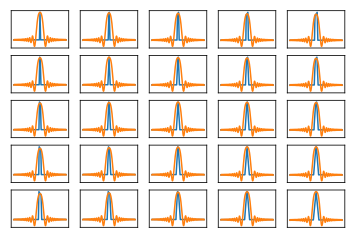

In [16]:
#s1 = [0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5,2.8]
s1 = [1.0,2.0,3.0,4.0,5.0]
n = len(s1) 
counter = 1
for i,sc1, in enumerate(s1):
    for j,sc2, in enumerate(s1):
        plt.subplot(n,n,counter)
        alpha  = lambda x: tophat(x, sc1*sigma1)
        beta = lambda x: tophat(x, sc2*sigma2)
        y1 = jsa_diag(l, alpha, beta, wcs)
        y2 = jsa_anti_diag(l, alpha, beta, wcs)
        plt.plot(y1)
        plt.plot(y2)
        plt.xticks([])
        plt.yticks([])
        counter = counter+1
        print(counter)
        
plt.savefig("fig2.svg")